In [26]:
import numpy as np
import xarray as xr
import xrft
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
ys, dy = (58,8)
dt = 3e2
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

dsnap = open_mdsdataset(op.join(ddir,'deepML_5km_consTauMOM'), grid_dir=op.join(ddir,'5km_grid'),
                       iters=range(ts,te,4320), prefix=['MOMsnap'], delta_t=dt
                       )
dsnap

6013440 6842880


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTauMOM. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 192)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [4]:
grid = Grid(dsnap, periodic=['X'])

In [5]:
ys, dy = (58,8)
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

dsave = open_mdsdataset(op.join(ddir,'deepML_5km_consTauMOM'), grid_dir=op.join(ddir,'5km_grid'),
                       iters=range(ts+8640,te+8640,8640), prefix=['MOMtave'], delta_t=dt
                       )
dsave

6013440 6842880


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTauMOM. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 96)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, 

In [6]:
ys, dy = (58,8)
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

dskpp = open_mdsdataset(op.join(ddir,'deepML_5km_consTauKPP'), grid_dir=op.join(ddir,'5km_grid'),
                       iters=range(ts+8640,te+8640,8640), prefix=['KPPboundary'], delta_t=dt
                       )
dskpp

6013440 6842880


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTauKPP. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 96)
Coordinates:
  * XC        (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC        (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG        (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG        (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z         (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1       (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu        (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zl        (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA        (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG       (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG       (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth   

In [7]:
MXLD = dskpp.MXLDEPTH
MXLD

<xarray.DataArray 'MXLDEPTH' (time: 96, YC: 400, XC: 200)>
dask.array<shape=(96, 400, 200), dtype=float32, chunksize=(1, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    iter     (time) int64 dask.array<shape=(96,), chunksize=(1,)>
  * time     (time) float64 1.807e+09 1.809e+09 1.812e+09 1.814e+09 ...
Attributes:
    standard_name:  MXLDEPTH
    long_name:      Mixed-Layer Depth (>0)
    units:          m

In [8]:
seas = ('time',np.tile(np.repeat(range(4),3),dy))
months = ('time',np.tile(np.repeat(range(12),1),dy))
dsave.coords['seas'] = seas
dsave.coords['months'] = months
MXLD.coords['months'] = months
with ProgressBar():
    dsave_seas = dsave.groupby('seas').mean(['time','XC','XG']).load()
    dsave_mon = dsave.groupby('months').mean(['time','XC','XG']).load()
    MXLD_mon = MXLD.groupby('months').mean(['time','XC']).load()
dsave_seas

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

<xarray.Dataset>
Dimensions:  (YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, seas: 4)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    drC      (Zp1) >f4 0.5 1.07 1.22 1.395 1.595 1.815 2.065 2.35 2.67 3.025 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...
    PHrefF   (Zp1) >f4 0.0 9.81 20.9934 33.7464 48.3633 65.0403 83.9736 ...
  * seas     (seas) int64 0 1 2 3
Data variables:
    UVEL     (seas, Z, YC) float32 0.0 0.006746654 0.00751

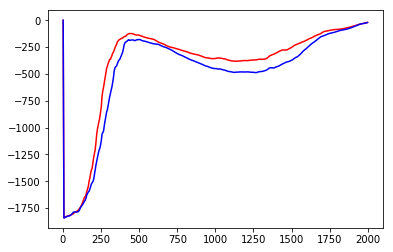

In [9]:
fig, ax = plt.subplots()
ax.plot(MXLD_mon.YC*1e-3, -MXLD_mon[1], 'r')
ax.plot(MXLD_mon.YC*1e-3, -MXLD_mon[7], 'b')

In [10]:
seas = ('time',np.tile(np.repeat(range(4),6),dy))
months = ('time',np.tile(np.repeat(range(12),2),dy))
dsnap.coords['seas'] = seas
dsnap.coords['months'] = months
dsanom = dsnap.groupby('seas') - dsave_seas
dsanomon = dsnap.groupby('months') - dsave_mon
with ProgressBar():
    dsanom.load()
    dsanomon.load()
dsanom

[########################################] | 100% Completed |  2min 35.0s
[########################################] | 100% Completed | 27.6s


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 192)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    dxG      (YG, XC) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    dyG      (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    Depth    (YC

In [11]:
up = dsanom.UVEL
vp = dsanom.VVEL
wp = dsanom.WVEL
phip = dsanom.PHIHYD

bp = grid.diff(phip,'Z',boundary='fill')/grid.diff(phip.Z,'Z',boundary='fill')
wpbp = wp*bp
wpbp

<xarray.DataArray (time: 192, Zl: 76, YC: 400, XC: 200)>
array([[[[-0.000000e+00, ..., -0.000000e+00],
         ...,
         [ 6.723970e-12, ...,  1.116289e-11]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 1.375474e-11, ...,  1.668123e-11]]],


       ...,


       [[[-0.000000e+00, ..., -0.000000e+00],
         ...,
         [ 4.824653e-11, ...,  8.222198e-11]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-6.874696e-12, ..., -1.302006e-11]]]], dtype=float32)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    iter     (time) int64 6013440 6017760 60220

<xarray.DataArray (time: 192, Z: 76, YC: 400, XC: 200)>
array([[[[0.000000e+00, ..., 0.000000e+00],
         ...,
         [1.439200e-04, ..., 1.477081e-04]],

        ...,

        [[0.000000e+00, ..., 0.000000e+00],
         ...,
         [2.956493e-05, ..., 4.018554e-05]]],


       ...,


       [[[0.000000e+00, ..., 0.000000e+00],
         ...,
         [5.622942e-07, ..., 1.268288e-07]],

        ...,

        [[0.000000e+00, ..., 0.000000e+00],
         ...,
         [6.704579e-05, ..., 6.579985e-05]]]], dtype=float32)
Coordinates:
  * time     (time) float64 1.804e+09 1.805e+09 1.807e+09 1.808e+09 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...

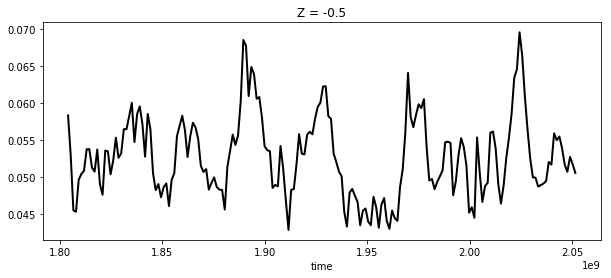

In [13]:
eke = .5 * (grid.interp(up,'X')**2 + grid.interp(vp,'Y',boundary='fill')**2)
eke[:,0].sel(YC=slice(6e5,1.4e6)).mean(['YC','XC']).plot(figsize=(10,4),color='k',lw=2)
eke

In [12]:
dsurf = open_mdsdataset(op.join(ddir,'deepML_5km_consTausurf'), grid_dir=op.join(ddir,'5km_grid'),
                        iters=range(ts+8640,te+8640,8640), prefix=['SurfForc'], delta_t=dt
                       )
dsurf

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTausurf. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 96)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, 

In [14]:
eke.coords['months'] = months
eke_std = eke[:,0].sel(YC=slice(6e5,1.4e6)).mean(['YC','XC']).groupby('months').std('time')
eke_mean = eke[:,0].sel(YC=slice(6e5,1.4e6)).groupby('months').mean(['time','XC','YC'])
eke_std

<xarray.DataArray (months: 12)>
array([0.006389, 0.007206, 0.003969, 0.00324 , 0.005125, 0.004028, 0.003915,
       0.004401, 0.003968, 0.006769, 0.005241, 0.004662])
Coordinates:
    Z        float32 -0.5
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 10 11

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


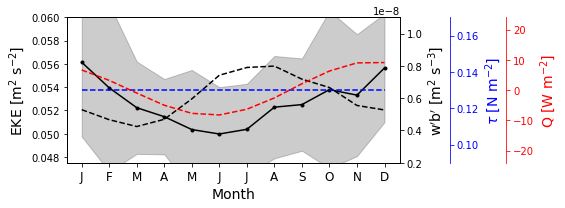

In [15]:
tau = dsurf.oceTAUX
tau.coords['months'] = ('time',np.tile(np.repeat(range(12),1),dy))
Q = dsurf.TFLUX
Q.coords['months'] = ('time',np.tile(np.repeat(range(12),1),dy))
eke.coords['months'] = ('time',np.tile(np.repeat(range(12),2),dy))
wpbp.coords['months'] = ('time',np.tile(np.repeat(range(12),2),dy))
# tau = 0.15 - 0.05*np.sin(np.pi/3.*np.arange(2,14))

fig, ax = plt.subplots(figsize=(8,3))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
ax4.spines["right"].set_position(("axes", 1.32))
im1, = ax.plot(eke_mean, 'k.-')
ax.fill_between(range(12), eke_mean-eke_std, eke_mean+eke_std, color='k', alpha=0.2)
im2, = ax2.plot(wpbp[:,22].sel(YC=slice(6e5,1.4e6)).groupby('months').mean(['time','XC','YC']), 'k--')
im3, = ax3.plot(range(12), tau.sel(YC=slice(6e5,1.4e6)).groupby('months').mean(['time','XG','YC']), 'b--')
im4, = ax4.plot(range(12), Q.sel(YC=slice(6e5,1.4e6)).groupby('months').mean(['time','XC','YC']), 'r--')

ax3.yaxis.label.set_color(im3.get_color())
ax4.yaxis.label.set_color(im4.get_color())

ax2.spines["right"].set_edgecolor(im2.get_color())
ax3.spines["right"].set_edgecolor(im3.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())

ax2.tick_params(axis='y', colors=im2.get_color())
ax3.tick_params(axis='y', colors=im3.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax.set_xticks(range(12))
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'], fontsize=12)
ax.set_xlabel(r'Month', fontsize=14)
ax.set_ylabel(r'EKE [m$^2$ s$^{-2}$]', fontsize=14)
ax2.set_ylabel(r"w$'$b$'$ [m$^{2}$ s$^{-3}$]", fontsize=14)
ax3.set_ylabel(r'$\tau$ [N m$^{-2}$]', fontsize=14)
ax4.set_ylabel(r'Q [W m$^{-2}$]', fontsize=14)
ax.set_ylim([0.0475,0.06])
ax2.set_ylim([0.2e-8,1.1e-8])
ax3.set_ylim([0.09,0.17])
ax4.set_ylim([-24,24])
plt.savefig(op.join(ddir,'Figures/EKEconsTau_Q_tau.pdf'))

In [ ]:
uk = xrft.dft(grid.interp(up,'X').sel(YC=slice(6e5,1.4e6))[:,::2].chunk(chunks={'time':1,'Z':1,'YC':1,'XC':200}),
             dim=['XC'], detrend='constant')
vk = xrft.dft(grid.interp(vp,'Y',boundary='fill').sel(YC=slice(6e5,1.4e6)
                                                     )[:,::2].chunk(chunks={'time':1,'Z':1,'YC':1,'XC':200}),
             dim=['XC'], detrend='constant')
with ProgressBar():
    ekek = (uk*np.conj(uk) + vk*np.conj(vk)).real.compute()

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[#######                                 ] | 17% Completed |  1hr  1min  7.9s

In [17]:
ekek

<xarray.DataArray (time: 192, Z: 38, YC: 160, freq_XC: 200)>
array([[[[2.441688e-04, ..., 3.024612e-04],
         ...,
         [2.075678e-04, ..., 1.043056e-04]],

        ...,

        [[4.821467e-08, ..., 3.562728e-08],
         ...,
         [1.730682e-08, ..., 8.456407e-10]]],


       ...,


       [[[1.082834e-03, ..., 5.220697e-04],
         ...,
         [1.332236e-05, ..., 3.194382e-05]],

        ...,

        [[3.244247e-09, ..., 3.112435e-08],
         ...,
         [2.925221e-08, ..., 1.447708e-08]]]])
Coordinates:
  * time             (time) float64 1.804e+09 1.805e+09 1.807e+09 1.808e+09 ...
  * Z                (Z) >f4 -0.5 -2.79 -5.78 -9.66 -14.68 -21.125 -29.345 ...
  * YC               (YC) >f4 602500.0 607500.0 612500.0 617500.0 622500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06

In [18]:
ekek.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
ekek.to_dataset(name='eke').to_netcdf(op.join(ddir,'EKEk_5kmrun_constTau.nc'))
ekek_seas = ekek.groupby('seas').mean(['time'])
ekek_seas

<xarray.DataArray (seas: 4, Z: 38, YC: 160, freq_XC: 200)>
array([[[[1.727936e-04, ..., 2.575319e-04],
         ...,
         [1.690379e-04, ..., 1.323121e-04]],

        ...,

        [[6.310583e-08, ..., 3.956266e-08],
         ...,
         [6.005468e-08, ..., 8.370218e-08]]],


       ...,


       [[[3.047298e-04, ..., 1.906324e-04],
         ...,
         [1.993777e-04, ..., 2.138279e-04]],

        ...,

        [[5.051369e-08, ..., 3.410665e-08],
         ...,
         [3.912906e-08, ..., 4.631936e-08]]]])
Coordinates:
  * Z                (Z) >f4 -0.5 -2.79 -5.78 -9.66 -14.68 -21.125 -29.345 ...
  * YC               (YC) >f4 602500.0 607500.0 612500.0 617500.0 622500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06
  * seas             (seas) int64 0 1 2 3

In [19]:
dsT = xr.open_dataset(op.join(ddir,'EKEk_5kmrun_constSST.nc'))
ekek_SST = dsT.eke
ekekSST_seas = ekek_SST.groupby('seas').mean(['time'])
ekekSST_seas

<xarray.DataArray 'eke' (seas: 4, Z: 38, YC: 160, freq_XC: 200)>
array([[[[1.527042e-04, ..., 2.379453e-04],
         ...,
         [2.304828e-04, ..., 1.758618e-04]],

        ...,

        [[4.445745e-07, ..., 4.154123e-07],
         ...,
         [1.957877e-07, ..., 2.346225e-07]]],


       ...,


       [[[9.438372e-05, ..., 1.526109e-04],
         ...,
         [3.696256e-04, ..., 4.285281e-04]],

        ...,

        [[9.495256e-08, ..., 9.261221e-08],
         ...,
         [7.443882e-08, ..., 7.214509e-08]]]])
Coordinates:
  * Z                (Z) float32 -0.5 -2.79 -5.78 -9.66 -14.68 -21.125 ...
  * YC               (YC) float32 602500.0 607500.0 612500.0 617500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 ...
  * seas             (seas) int64 0 1 2 3

In [20]:
dsAVI = xr.open_dataset('/home/takaya/AVISO/AVISO_EKE_56-61S.nc')
eke_AVISO = dsAVI.eke.mean('latitude')
k_AVISO = dsAVI.kx.mean('lat')
N = eke_AVISO.shape

In [21]:
seas = np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3])
eke_AVISO_yrs = eke_AVISO[:598]
eke_AVISO_yrs.coords['DinY'] = ('days',np.tile(seas,23))
eke_AVISO_seas = eke_AVISO_yrs.groupby('DinY').mean('days')
eke_AVISO_seas

<xarray.DataArray 'eke' (DinY: 4, freq_longitude: 1440)>
array([[2.506621e-06, 2.485474e-06, 2.434433e-06, ..., 2.443550e-06,
        2.434433e-06, 2.485474e-06],
       [2.412033e-06, 2.408242e-06, 2.433481e-06, ..., 2.460021e-06,
        2.433481e-06, 2.408242e-06],
       [2.058867e-05, 2.087148e-05, 2.099281e-05, ..., 2.072719e-05,
        2.099281e-05, 2.087148e-05],
       [2.714788e-05, 2.721186e-05, 2.647504e-05, ..., 2.768460e-05,
        2.647504e-05, 2.721186e-05]])
Coordinates:
  * freq_longitude          (freq_longitude) float64 -2.0 -1.997 -1.994 ...
    freq_longitude_spacing  float64 ...
  * DinY                    (DinY) int64 0 1 2 3

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


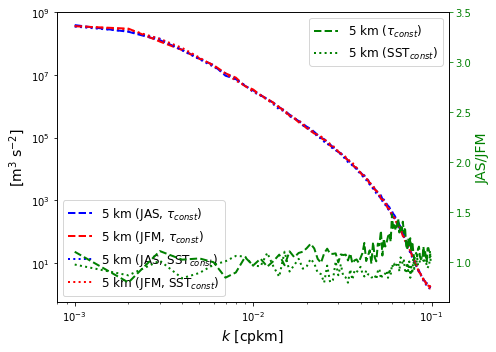

In [22]:
seasons = ['JFM','AMJ','JAS','OND']
colors = ['r','brown','b','g']

fig, ax = plt.subplots(figsize=(7,5))
fig.set_tight_layout(True)
ax2 = ax.twinx()
# ax.plot(ekek10.freq_XC[1:]*1e3, ekek10[:,0].sel(YC=slice(10e5,12e5)).mean(['time','YC'])*ekek10.freq_XC[1:]**-1,
#        'k', lw=2, label='10 km')

# ax.plot(ekek.freq_XC[100:]*1e3, ekek[:,0,:,100:].sel(YC=slice(10e5,12e5)).mean(['time','YC'])*ekek.freq_XC[100:]**-1,
#        'k--', lw=2, label='5 km')
ax.plot(ekek.freq_XC[100:]*1e3, ekek_seas[2,0,:,100:].sel(YC=slice(10e5,12e5)).mean(['YC'])*ekek.freq_XC[100:]**-1,
       'b--', lw=2, label=r'5 km (JAS, $\tau_{const}$)')
ax.plot(ekek.freq_XC[100:]*1e3, ekek_seas[0,0,:,100:].sel(YC=slice(10e5,12e5)).mean(['YC'])*ekek.freq_XC[100:]**-1,
       'r--', lw=2, label=r'5 km (JFM, $\tau_{const}$)')
ax.plot(ekek.freq_XC[100:]*1e3, ekekSST_seas[2,0,:,100:].sel(YC=slice(10e5,12e5)).mean(['YC'])*ekek.freq_XC[100:]**-1,
       'b:', lw=2, label=r'5 km (JAS, SST$_{const}$)')
ax.plot(ekek.freq_XC[100:]*1e3, ekekSST_seas[0,0,:,100:].sel(YC=slice(10e5,12e5)).mean(['YC'])*ekek.freq_XC[100:]**-1,
       'r:', lw=2, label=r'5 km (JFM, SST$_{const}$)')

# ax.plot(k_AVISO[20:]*1e3, eke_AVISO[:,int(.5*N[1])+20:].mean('days').data*k_AVISO[20:]**-1,
#        'k:', lw=2, label='AVISO')
# ax.plot(k_AVISO[20:]*1e3, eke_AVISO_seas[2,int(.5*N[1])+20:].data*k_AVISO[20:]**-1,
#        'b:', lw=2, label='AVISO (JAS)')
# ax.plot(k_AVISO[20:]*1e3, eke_AVISO_seas[0,int(.5*N[1])+20:].data*k_AVISO[20:]**-1,
#        'r:', lw=2, label='AVISO (JFM)')

im, = ax2.plot(ekek.freq_XC[101:]*1e3, (ekek_seas[2,0,:,101:]/ekek_seas[0,0,:,101:]).sel(YC=slice(10e5,12e5)).mean(['YC']),
            'g--', lw=2, label=r'5 km ($\tau_{const}$)')
ax2.plot(ekek.freq_XC[101:]*1e3, (ekekSST_seas[2,0,:,101:]/ekekSST_seas[0,0,:,101:]).sel(YC=slice(10e5,12e5)).mean(['YC']),
        'g:', lw=2, label=r'5 km (SST$_{const}$)')
# ax2.plot(k_AVISO[20:-50][::5]*1e3, (eke_AVISO_seas[2,int(.5*N[1])+20:-50]/eke_AVISO_seas[0,int(.5*N[1])+20:-50])[::5],
#         'g:', lw=2, label='AVISO')

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([0.6,3.5])
ax2.yaxis.label.set_color(im.get_color())
ax2.tick_params(axis='y', colors=im.get_color())
ax.set_xlabel(r'$k$ [cpkm]', fontsize=14)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]', fontsize=14)
ax2.set_ylabel(r'JAS/JFM', fontsize=14)
ax.legend(loc='lower left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label(r"[m$^3$ s$^{-2}$]", fontsize=12)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.savefig(op.join(ddir,'Figures/EKEclim_consTau&SST.pdf'))